In [65]:
import pandas as pd
from PIL import Image, ImageDraw
from colorsys import hls_to_rgb 
import numpy as np
from IPython.display import display

In [66]:
# --- 1. CONFIGURATION (SETTINGS) ---
IMAGE_SIZE = 800  # Canvas er size (800x800 pixels)
MAX_RADIUS = 40   # point/circle (Maximum size)
BACKGROUND_COLOR = (0, 0, 0) # Black background
DATA_FILE = 'IRIS.csv'

In [68]:
iris_df = pd.read_csv(DATA_FILE)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
iris_df.reset_index(inplace=True)

In [70]:
iris_df.describe()


,index,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
iris_df.isnull().sum()

index           0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
iris_df.duplicated().sum()

0

In [73]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
iris_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [75]:
# --- 1. DATA PROCESSING AND NORMALIZATION ---

numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


for col in numeric_cols:
    min_val = iris_df[col].min()
    max_val = iris_df[col].max()
    range_val = max_val - min_val
    
    # Min-Max Normalization formula: (Value - Min) / Range
    if range_val == 0:
        
        iris_df[f'Norm_{col}'] = 0.5 
    else:
        # Normalization
        iris_df[f'Norm_{col}'] = (iris_df[col] - min_val) / range_val

print("Normalization complete.")



print(iris_df.filter(like='Norm_').head())

Normalization complete.
   Norm_sepal_length  Norm_sepal_width  Norm_petal_length  Norm_petal_width
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


In [80]:
# --- COLOR LOGIC SETUP ---

def get_species_hue(species):
    
    if species == 'Iris-setosa':
        return 30    # Orange (Warm Color Cluster)
    elif species == 'Iris-versicolor':
        return 180   # Cyan (Cool Color Cluster)
    else: # Iris-virginica
        return 270   # Purple (Vibrant Color Cluster)

def hls_to_rgba(hue, lightness, saturation, alpha_norm):
    """HSL to RGBA (with Transparency) """
    
    r, g, b = hls_to_rgb(hue / 360.0, lightness / 100.0, saturation / 100.0)
    
    
    r = int(r * 255)
    g = int(g * 255)
    b = int(b * 255)
    alpha = int(alpha_norm * 255)
    
    return (r, g, b, alpha)

print("Color HSL mapping functions ready.")

Color HSL mapping functions ready.


In [ ]:
# --- THE GENERATIVE ALGORITHM ---

img = Image.new('RGB', (IMAGE_SIZE, IMAGE_SIZE), BACKGROUND_COLOR)
draw = ImageDraw.Draw(img, 'RGBA') 


for index, row in iris_df.iterrows():
    
    # --- MAPPING & TRANSFORMATION ---
    
    # POSITION (X & Y) - mapping from Sepal Length and Width 
    x = int(row['Norm_sepal_length'] * IMAGE_SIZE)
    y = int(row['Norm_sepal_width'] * IMAGE_SIZE)
    
    # SIZE (Radius) - mapping Petal Length 
    # Size = 5 (minimum) + 40 (maximum range)
    radius = 5 + int(row['Norm_petal_length'] * MAX_RADIUS) 
    
    # COLOR (RGBA) - mapping from Species and Petal Width
    hue = get_species_hue(row['species'])
    alpha_norm = row['Norm_petal_width'] # Opacity (0.0 to 1.0)
    
    final_color = hls_to_rgba(
        hue=hue, 
        lightness=60, # Fixed lightness
        saturation=90, # Fixed saturation
        alpha_norm=alpha_norm
    )
    
    # --- DRAWING THE SHAPE (CIRCLE) ---
    
    # Circle er Bounding Box
    bbox = (x - radius, y - radius, x + radius, y + radius)
    
    # Circle aanka (semi-transparent)
    draw.ellipse(bbox, fill=final_color)

print("Generative Algorithm finished. Image is ready to display.")

Generative Algorithm finished. Image is ready to display.



--- FINAL ABSTRACT ART OUTPUT ---


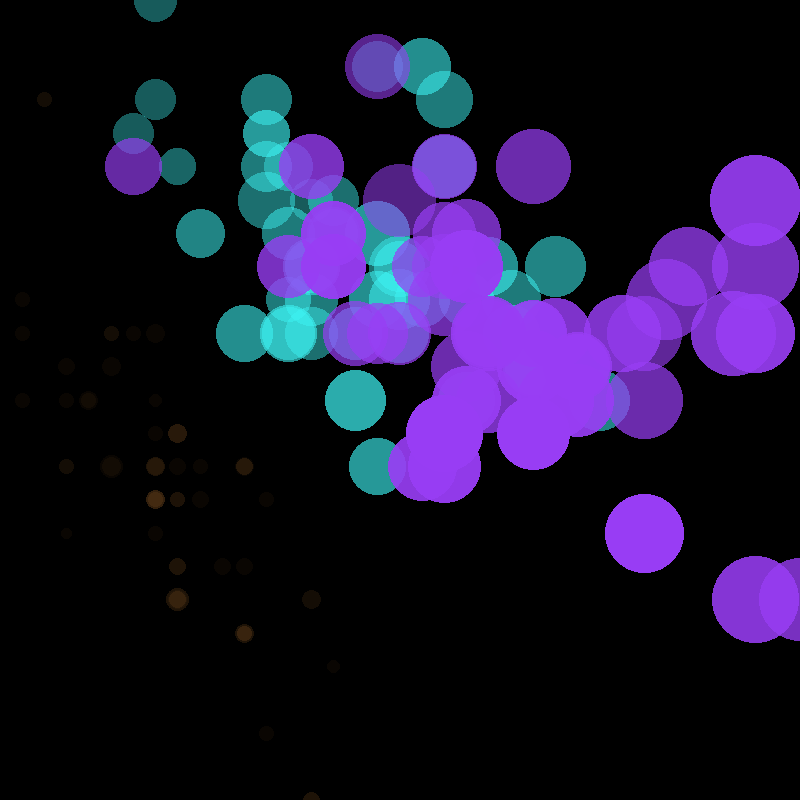


 Art successfully saved as: iris_abstract_art_final.png


In [82]:
# --- DISPLAY AND SAVE FINAL ART ---

output_filename = 'iris_abstract_art_final.png'

print("\n--- FINAL ABSTRACT ART OUTPUT ---")
display(img)

try:
    img.save(output_filename)
    print(f"\n Art successfully saved as: {output_filename}")
    
except Exception as e:
    print(f"Error saving image: {e}")